# Welcome to Assignment 5
# Sha Liu
There are two parts in this assignment. The conceptual questions could be answered by words, and the coding questions require some computation.

## Conceptual questions
### Q1. Suppose we want to build a connected network with 10 nodes and average degree 1.8, such that the heterogeneity parameter is largest. What does the graph look like?

hint: you don't have to use Networkx to construct a network and plot it. A simple description would do :)

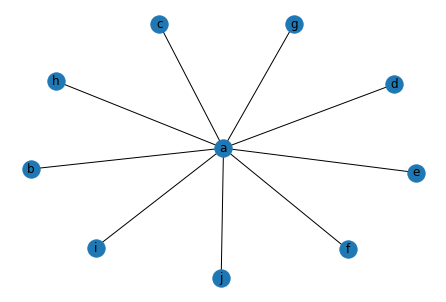

In [1]:
%matplotlib inline
import networkx as nx
G = nx.Graph()
nodes_to_add = ['a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
G.add_nodes_from(nodes_to_add)
edges_to_add = [('a', 'b'), ('a', 'c'), ('a', 'd'), ('a', 'e'), ('a', 'f'), ('a', 'g'), ('a', 'h'), ('a', 'i'), ('a', 'j'),  ]
G.add_edges_from(edges_to_add)
nx.draw(G, with_labels=True)

In [2]:
degree_sequence = [G.degree(n) for n in G.nodes]
import statistics
print('Mean degree:', statistics.mean(degree_sequence))

Mean degree: 1.8


The above connected network has 10 nodes and average degree 1.8, such that the heterogeneity parameter is largest as node 'a' has degree of 9, which is the highest when there are 10 nodes in total.


### Q2. Are there networks such that the average number of neighbors of a node’s neighbors match the average degree? If there are, what property must they have?

Yes, when the highest degree equals the average degree of the nodes, which means all nodes have the same degree. Please see my example below. 

Highest degree: 3
For network average degree is 3 and neighbors average degree is 3.0


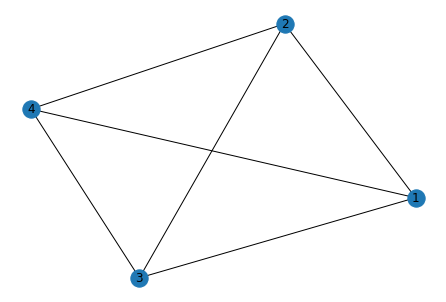

In [3]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4])
G.add_edges_from([(1,2),(2,3),(3,4),(4,1),(1,3),(2,4)])
nx.draw(G, with_labels=True)

degree_sequence = [G.degree(n) for n in G.nodes]

highest_degree_node = max(G.nodes, key=G.degree)
print('Highest degree:', G.degree(highest_degree_node))

mean_deg = statistics.mean(degree_sequence)
avg_neigh_deg = 0
for node in G.nodes():
    neigh_deg = 0
    for neigh in G.neighbors(node):
        neigh_deg += (G.degree(neigh))
    avg_neigh_deg += (neigh_deg/len(list(G.neighbors(node))))
avg_neigh_deg = avg_neigh_deg/len(G.nodes)
print(f'For network average degree is {mean_deg} and neighbors average degree is {avg_neigh_deg}')

## Coding Questions

We will be using **socfb-Northwestern25** network for the following questions. You could find it in the book’s Github repository dataset folder or on Canvas. It is a snapshot of Northwestern University’s Facebook network. The nodes are anonymous users and the links are friend relationships. Load this network into a NetworkX graph in order to answer the following questions. **Be sure to use the proper graph class for an undirected, unweighted network.**

### Q3.  What proportion of nodes have degree 100 or greater?
hint: ratio of number of nodes having degree no less than 100 divided by the total number of nodes.

In [4]:
G = nx.read_edgelist('../datasets/socfb-Northwestern25.edges', nodetype=int)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 10567
Number of edges: 488337
Average degree:  92.4268


In [5]:
degree_greater_100_sequence = [G.degree(n) for n in G.nodes if G.degree(n) >= 100]
print("Ratio of number of nodes having degree no less than 100 =", len(degree_greater_100_sequence)/G.number_of_nodes())

Ratio of number of nodes having degree no less than 100 = 0.3821330557395666


### Q4. What is the maximum degree in this network?

In [6]:
highest_degree_node = max(G.nodes, key=G.degree)
G.degree(highest_degree_node)

2105

### Q5. Users in this network are anonymized by giving the nodes numerical names. Which node has the highest degree?

In [7]:
highest_degree_node

8262

### Q6. What is 95th percentile for degree, i.e., the value such that 95% of nodes have this degree or less?

In [8]:
from collections import Counter
import numpy as np
degree_sequence = [G.degree(n) for n in G.nodes]
degree_counts = Counter(degree_sequence)
print("95th percentile for degree: ", np.percentile(list(degree_counts.values()), 95))

95th percentile for degree:  72.04999999999995


### Q7. Is the network assortative or disassortative?

In [9]:
nx.degree_assortativity_coefficient(G)

0.03444129080710951

As the assortativity coefficient is positive, so the network is assortative

### Q8. What is the mean degree for nodes in this network?

In [10]:
print('Mean degree:', statistics.mean(degree_sequence))

Mean degree: 92.42680041639065


### Q9. Which of the following shapes best describes the degree distribution in this network? You can obtain the answer visually using tools we have introduced such as histograms, cumulatives, or log-scale plots.

a) Normal  
b) Poissonian  
c) Power law  
d) Exponential  

Hint: 1) At least one visualization is needed 2) select your answer from the four options based on your visualizations. 

Firstly try draw a histogram of the degree distribution, shown below

<BarContainer object of 420 artists>

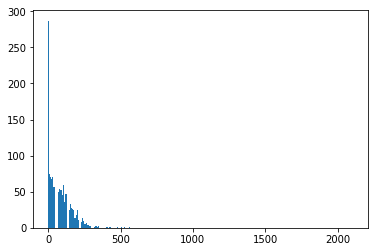

In [11]:
import matplotlib.pyplot as plt
plt.bar(degree_counts.keys(), degree_counts.values())

Secondly, draw probability distribution of degrees and try to fit with powerlaw. 

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Degree Distribution')]

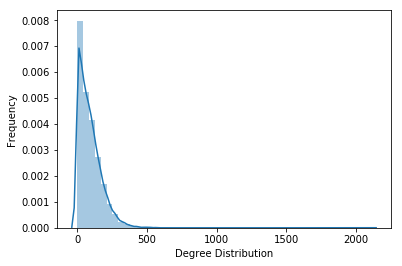

In [12]:
import seaborn as sns, numpy as np
from scipy.stats import poisson
ax = sns.distplot(degree_sequence, hist=True)
ax.set(xlabel='Degree Distribution', ylabel='Frequency')

Lastly, draw probability distribution of degrees and try to fit with power law. We can see that the powerlaw fit roughly fits the degree distribution. Therefore, Power law best describes the degree distribution in this network, shown below.

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Powerlaw Degree Distribution')]

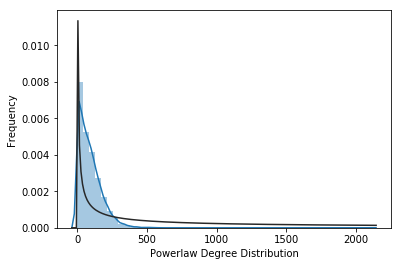

In [13]:
from scipy.stats import powerlaw
ax = sns.distplot(degree_sequence, fit = powerlaw, hist=True)
ax.set(xlabel='Powerlaw Degree Distribution', ylabel='Frequency')